In [1]:
import pandas as pd
from tqdm import tqdm
import os

### visualization on PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px
from adjustText import adjust_text

In [2]:
import rpy2
%load_ext rpy2.ipython

In [3]:
%%R 
library("FactoMineR")
library("factoextra")
library (data.table)
library(wesanderson)
library(ggrepel)
library(data.table)

R[write to console]: Loading required package: ggplot2

R[write to console]: Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

R[write to console]: data.table 1.14.8 using 24 threads (see ?getDTthreads).  Latest news: r-datatable.com



# Get feature importance data

## 1. Explore datasets

In [20]:
save_name = "loops_clustering_post_mortem_vs_iPSC_derived"
path_to_loops_clusters_data = "./loops_data/loops_clusters_data"
name_appender=""
merged_all_clusters = pd.read_pickle(f"{path_to_loops_clusters_data}/{save_name}_calculated_clusters_all{name_appender}.pickle")

In [21]:
data_clusters = merged_all_clusters[['source', 'cluster', 'intensity_median']].drop_duplicates()
data_clusters.source = [i.split('_sampled_dots_final_12000000maxloci')[0] for i in data_clusters.source]
data_clusters = data_clusters.pivot(index='source', columns='cluster', values='intensity_median').reset_index()

In [24]:
data_clusters.to_csv(f'./loops_pca_data/{save_name}_clusters_median.tsv',index=False, sep = "\t")
data_clusters.head()

cluster,source,chr10_1,chr10_10,chr10_100,chr10_1000,chr10_1003,chr10_1004,chr10_1005,chr10_1007,chr10_1008,...,chrX_97,chrX_971,chrX_974,chrX_98,chrX_986,chrX_988,chrX_99,chrX_991,chrX_993,chrX_994
0,Ballerino2022_iPSC_NeuNplus,13.439014,2.556178,1.766315,3.009546,1.805967,1.926814,7.126874,6.467533,2.592283,...,2.338758,1.645107,1.713456,2.351531,1.978901,2.041912,2.056143,5.729161,2.247119,4.329305
1,Heffel_adult,9.439307,3.374637,2.877962,2.371276,1.651476,1.741387,7.481023,6.303918,1.467309,...,1.878959,1.729331,1.858341,2.775101,1.420323,2.464201,1.805349,1.948189,1.950178,4.453437
2,Hu2021_NeuNplus,6.793287,2.986044,2.336453,2.393193,1.308352,1.470700,6.456359,4.188676,1.465466,...,1.613537,1.480558,1.839749,2.826851,2.456621,2.644763,1.957705,1.524645,1.477999,3.765523
3,Li2022_iPSC_NeuNplus,6.615060,2.793991,1.747213,2.407702,1.984635,1.913051,7.506290,7.122667,2.295274,...,1.624464,1.735857,1.722108,2.182221,1.560450,1.759105,1.456435,2.826585,2.101646,3.258266
4,Our_data_iPSC_NeuNplus,4.539134,1.969578,1.470844,2.659319,1.828973,1.694033,4.943831,3.838129,1.780823,...,2.396130,2.085676,2.349129,1.844142,1.911403,1.838023,1.772516,3.609973,2.351785,4.596777


## 2. Find contribution of features to PCA

In [25]:
%%R
path = './loops_pca_data/loops_clustering_post_mortem_vs_iPSC_derived_clusters_median.tsv'
loops_cultures_vs_postmortem <- fread(path, sep='\t', header=TRUE)
loops_cultures_vs_postmortem <- as.data.frame(loops_cultures_vs_postmortem)
rownames(loops_cultures_vs_postmortem) <- loops_cultures_vs_postmortem$source
loops_cultures_vs_postmortem <- replace(loops_cultures_vs_postmortem, is.na(loops_cultures_vs_postmortem), 0)
loops_cultures_vs_postmortem$source <- NULL


In [26]:
%%R
res.pca <- PCA(loops_cultures_vs_postmortem, ncp=12)
f1 <- fviz_contrib(res.pca, choice="var",
      axes = c(2) , top = 1000)
write.csv(f1$data, "./loops_pca_data/loops_clustering_post_mortem_vs_iPSC_derived_clusters_median_featureImportance_pca1_pca3.csv")

res.pca <- PCA(loops_cultures_vs_postmortem, ncp=12)
f1 <- fviz_contrib(res.pca, choice="var",
      axes = c(3) , top = 1000)
write.csv(f1$data, "./loops_pca_data/loops_clustering_post_mortem_vs_iPSC_derived_clusters_median_featureImportance_pca1_pca2.csv")


R[write to console]: dev.new(): using pdf(file="Rplots1.pdf")



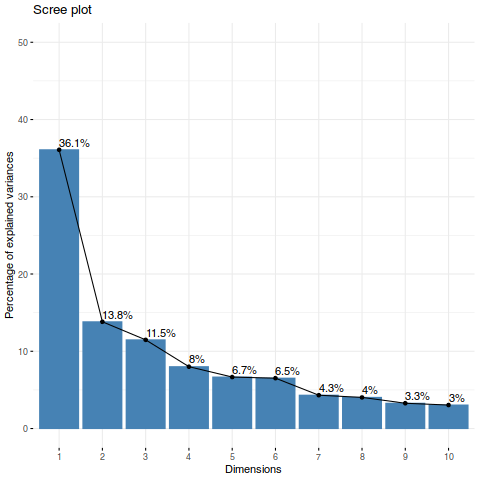

In [27]:
%%R
fviz_screeplot(res.pca, addlabels = TRUE, ylim = c(0, 50))

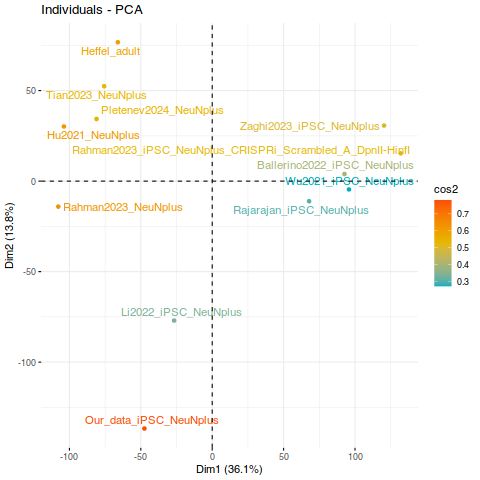

In [28]:
%%R
p = fviz_pca_ind(res.pca, col.ind = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE # Avoid text overlapping (slow if many points)
             )
p